In [5]:
# Ashley Mayo
# February 9th, 2025
# Week 9 - 10
# DSC 640: Data Presentation and Visualization

In [16]:
# Import Necessary Libraries
import pandas as pd
import seaborn as sns
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [6]:
# Load the datasets
iata_icao_df = pd.read_csv('./iata-icao.csv')
complaints_by_subcategory_df = pd.read_csv('./complaints-by-subcategory.csv')
complaints_by_category_df = pd.read_csv('./complaints-by-category.csv')
complaints_by_airport_df = pd.read_csv('./complaints-by-airport.csv')

In [7]:
# Step 1: Clean and Prepare Data

# Convert year_month columns to datetime for time-series analysis
complaints_by_subcategory_df['year_month'] = pd.to_datetime(complaints_by_subcategory_df['year_month'])
complaints_by_category_df['year_month'] = pd.to_datetime(complaints_by_category_df['year_month'])
complaints_by_airport_df['year_month'] = pd.to_datetime(complaints_by_airport_df['year_month'])

In [8]:
# Step 2: Merge Datasets

# Merge complaints by airport with IATA/ICAO data for location and airport name
complaints_airport_merged = pd.merge(
    complaints_by_airport_df,
    iata_icao_df,
    how='left',
    left_on='airport',
    right_on='iata'
)

# Merge complaints by category and subcategory for deeper insights
complaints_category_merged = pd.merge(
    complaints_by_category_df,
    complaints_by_subcategory_df,
    how='left',
    on=['airport', 'year_month', 'category']
)

# Merge with IATA/ICAO data for location-based analysis
complaints_category_merged = pd.merge(
    complaints_category_merged,
    iata_icao_df,
    how='left',
    left_on='airport',
    right_on='iata'
)

In [9]:
# Step 3: Preview the cleaned and merged datasets
complaints_airport_merged_head = complaints_airport_merged.head()
complaints_category_merged_head = complaints_category_merged.head()

complaints_airport_merged_head, complaints_category_merged_head

(  pdf_report_date airport_x year_month  count country_code   region_name iata  \
 0         2019-02       ABE 2015-01-01      0           US  Pennsylvania  ABE   
 1         2019-02       ABE 2015-02-01      0           US  Pennsylvania  ABE   
 2         2019-02       ABE 2015-03-01      0           US  Pennsylvania  ABE   
 3         2019-02       ABE 2015-04-01      0           US  Pennsylvania  ABE   
 4         2019-02       ABE 2015-05-01      2           US  Pennsylvania  ABE   
 
    icao                            airport_y  latitude  longitude  
 0  KABE  Lehigh Valley International Airport   40.6521   -75.4408  
 1  KABE  Lehigh Valley International Airport   40.6521   -75.4408  
 2  KABE  Lehigh Valley International Airport   40.6521   -75.4408  
 3  KABE  Lehigh Valley International Airport   40.6521   -75.4408  
 4  KABE  Lehigh Valley International Airport   40.6521   -75.4408  ,
   pdf_report_date_x airport_x                           category year_month  \
 0         

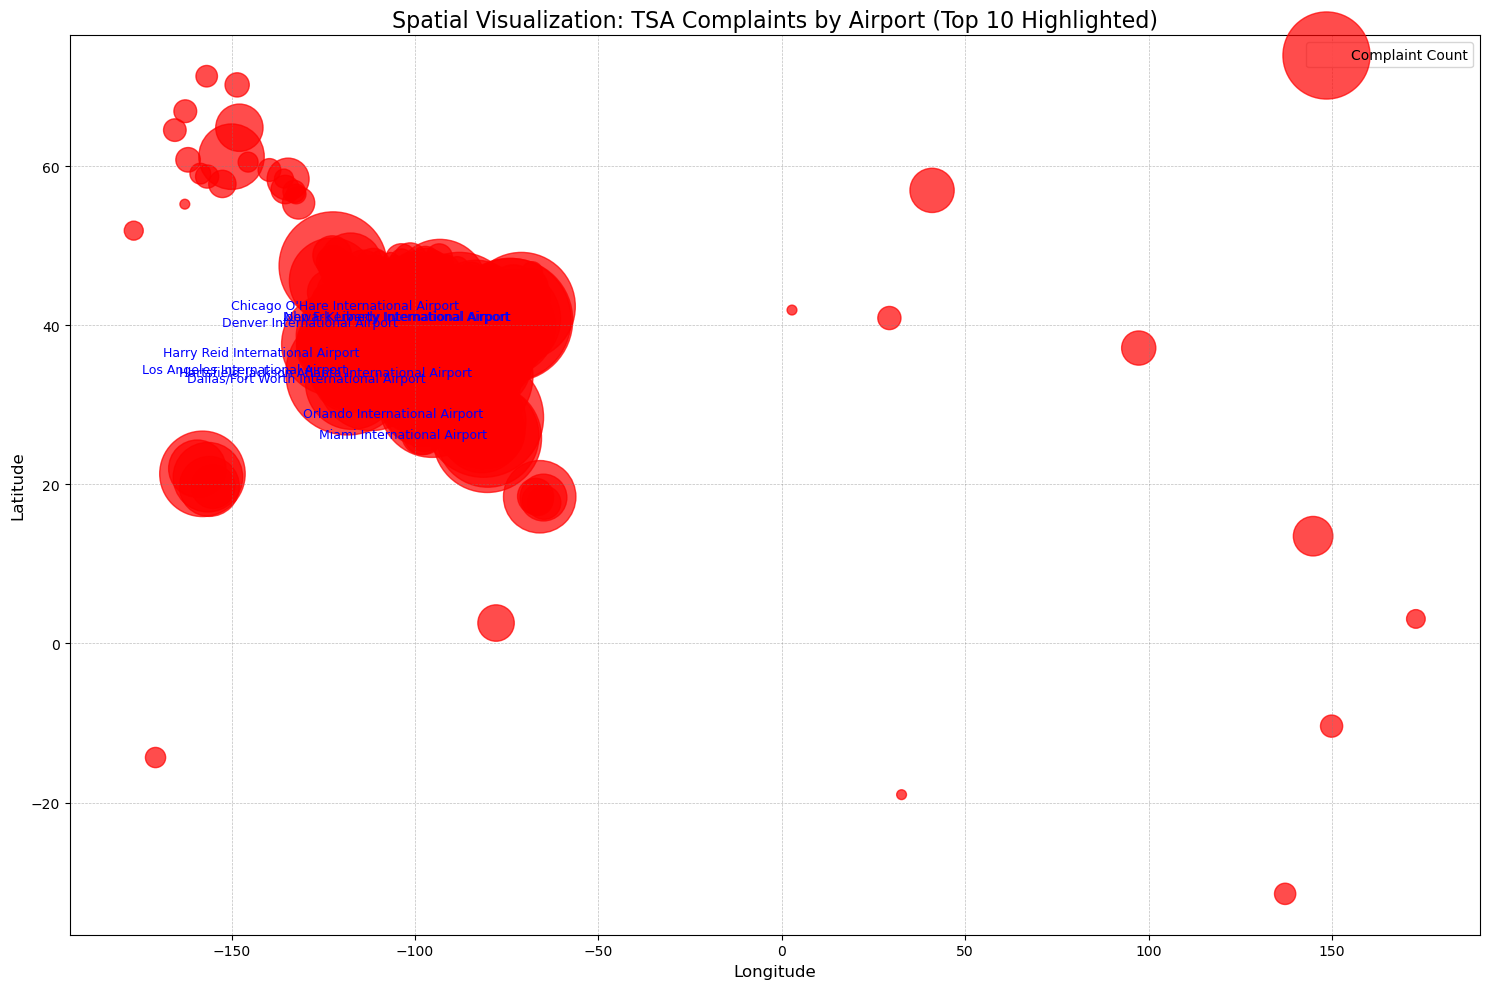

In [10]:
# Ensure datetime format for year_month
complaints_by_airport_df['year_month'] = pd.to_datetime(complaints_by_airport_df['year_month'])

# Merge complaints by airport with IATA/ICAO data
complaints_airport_merged = pd.merge(
    complaints_by_airport_df,
    iata_icao_df,
    how='left',
    left_on='airport',
    right_on='iata'
)

# Summarize complaints by geographic data
geo_complaints = complaints_airport_merged.groupby(
    ['latitude', 'longitude', 'airport_y']
)['count'].sum().reset_index()

# Filter for the top 10 airports with the highest complaints
top_airports = geo_complaints.nlargest(10, 'count')

# Re-plot the static spatial visualization
plt.figure(figsize=(15, 10))

# Scatter plot for all airports
plt.scatter(
    geo_complaints['longitude'],
    geo_complaints['latitude'],
    s=geo_complaints['count'] ** 0.5 * 50,  # Scale size based on complaints
    color='red',
    alpha=0.7,
    label="Complaint Count"
)

# Add labels only for the top 10 airports
for _, row in top_airports.iterrows():
    plt.text(
        row['longitude'], row['latitude'],
        row['airport_y'],
        fontsize=9,
        ha='right',
        color='blue'
    )

# Configure plot appearance
plt.title("Spatial Visualization: TSA Complaints by Airport (Top 10 Highlighted)", fontsize=16)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
plt.tight_layout()
plt.legend()
plt.show()


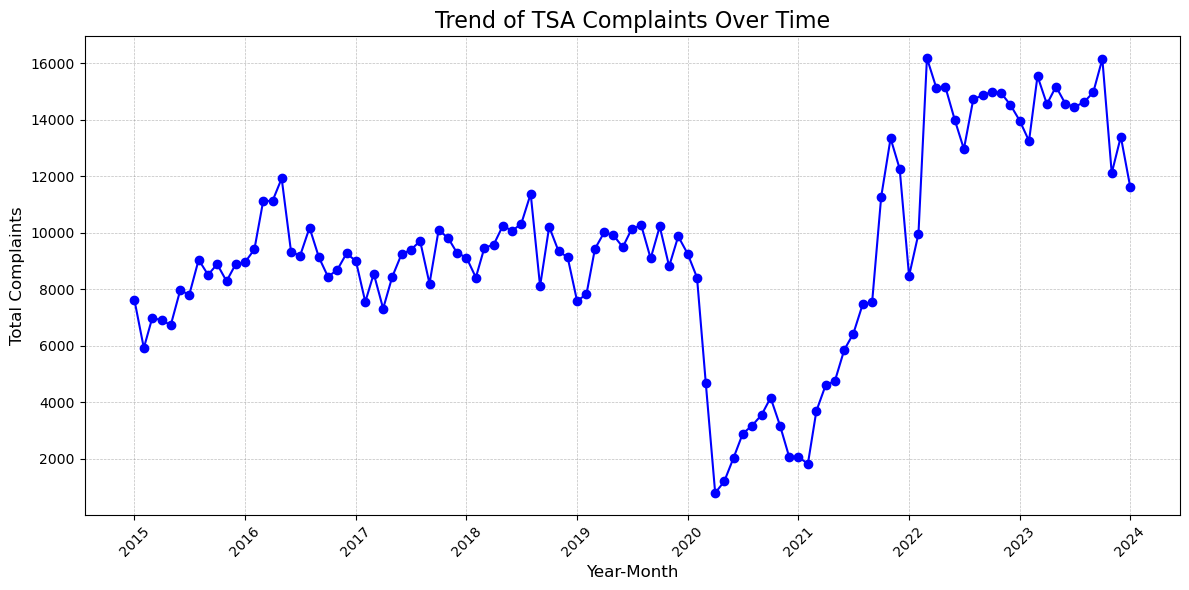

In [11]:
# Step 1: Line Chart - Trends in Total Complaints Over Time
complaints_over_time = complaints_by_airport_df.groupby('year_month')['count'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(
    complaints_over_time['year_month'],
    complaints_over_time['count'],
    marker='o',
    linestyle='-',
    color='b'
)
plt.title("Trend of TSA Complaints Over Time", fontsize=16)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Total Complaints", fontsize=12)
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

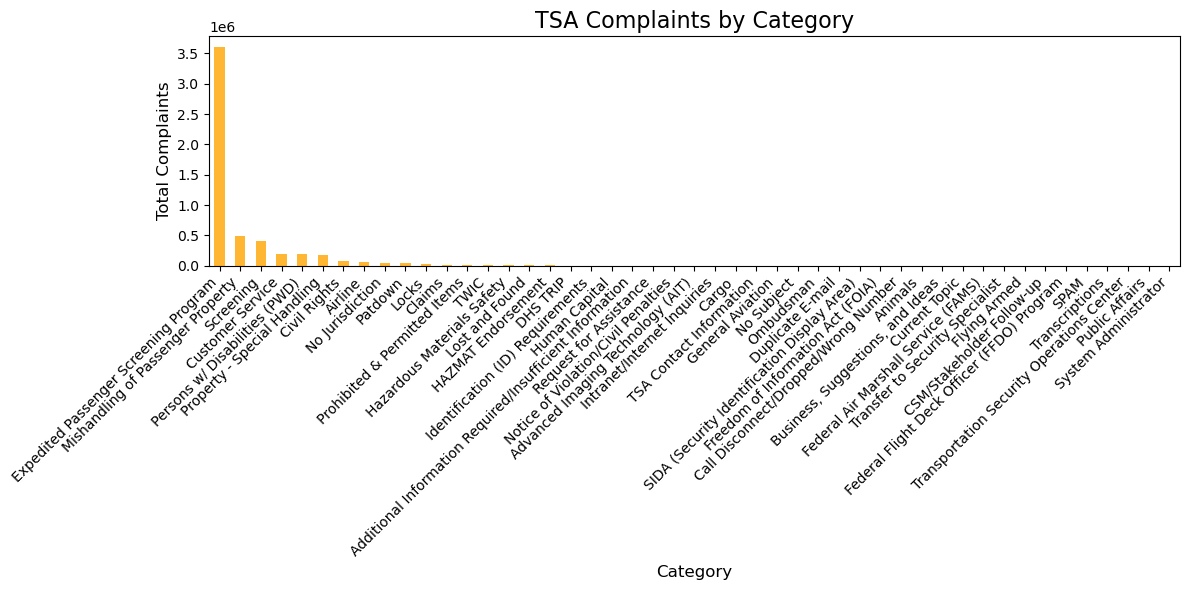

In [12]:
# Step 2: Bar Chart - Complaints by Category
complaints_by_category = complaints_category_merged.groupby('clean_cat_x')['count_x'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
complaints_by_category.plot(kind='bar', color='orange', alpha=0.8)
plt.title("TSA Complaints by Category", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Total Complaints", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

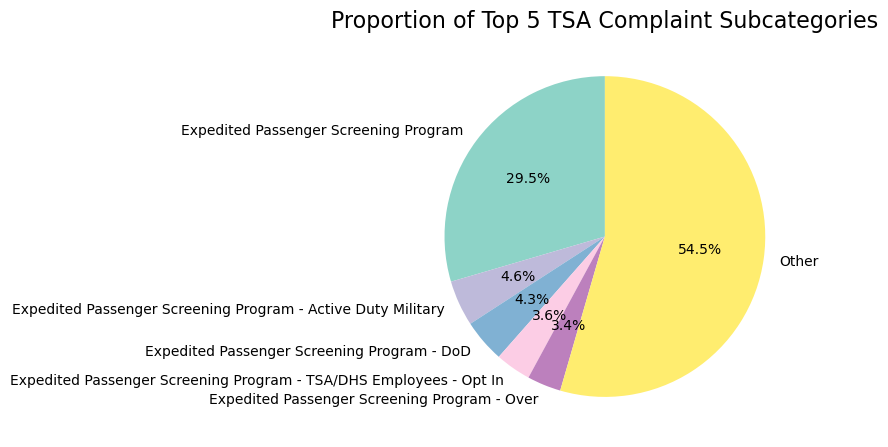

In [13]:
# Step 3: Pie Chart - Proportion of Top 5 Complaint Subcategories
complaints_by_subcategory = complaints_category_merged.groupby('subcategory')['count_x'].sum()
top_subcategories = complaints_by_subcategory.nlargest(5)
other_subcategories = complaints_by_subcategory.sum() - top_subcategories.sum()

# Combine top subcategories and "Other"
top_subcategories['Other'] = other_subcategories

plt.figure(figsize=(8, 8))
top_subcategories.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title("Proportion of Top 5 TSA Complaint Subcategories", fontsize=16)
plt.ylabel("")
plt.tight_layout()
plt.show()

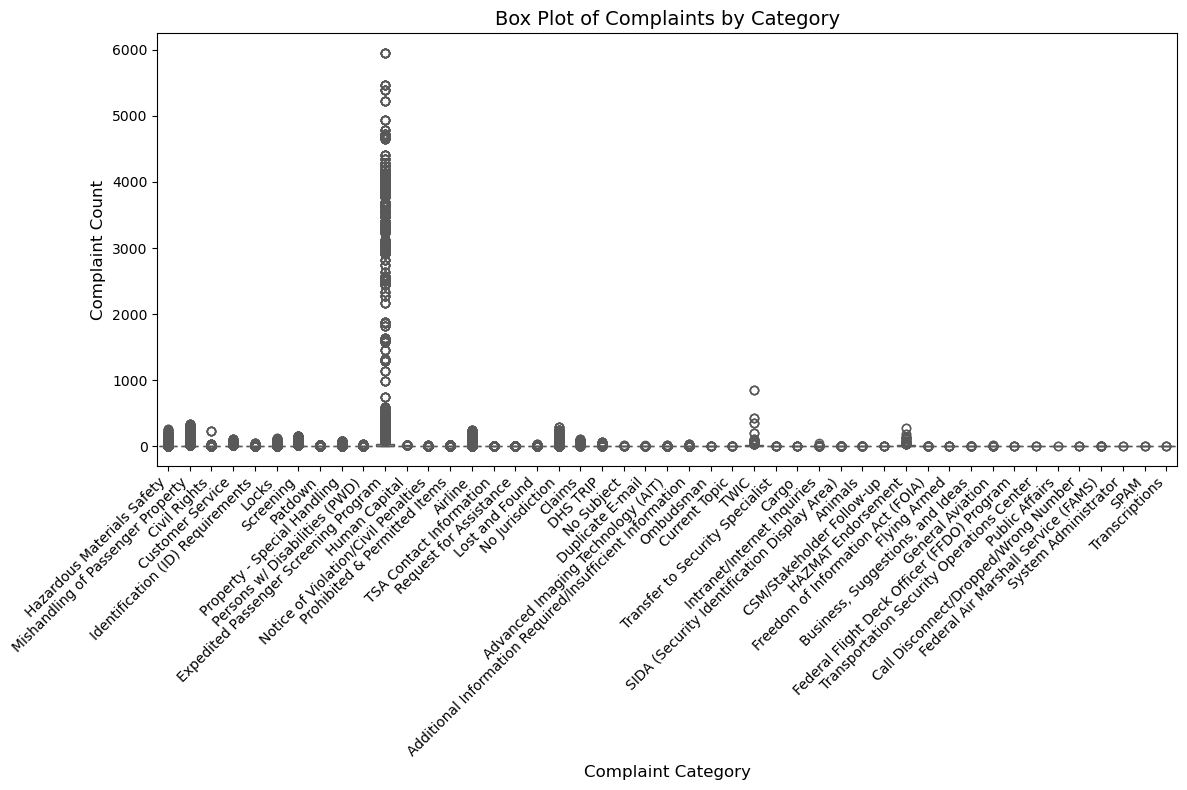

In [22]:
# Box Plot for complaints by category
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=complaints_category_merged,
    x='clean_cat_x',
    y='count_x',
    palette="Set2",
    hue='clean_cat_x',
    dodge=False
)
plt.title("Box Plot of Complaints by Category", fontsize=14)
plt.xlabel("Complaint Category", fontsize=12)
plt.ylabel("Complaint Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend([], [], frameon=False)  # Remove the extra legend
plt.tight_layout()
plt.show()

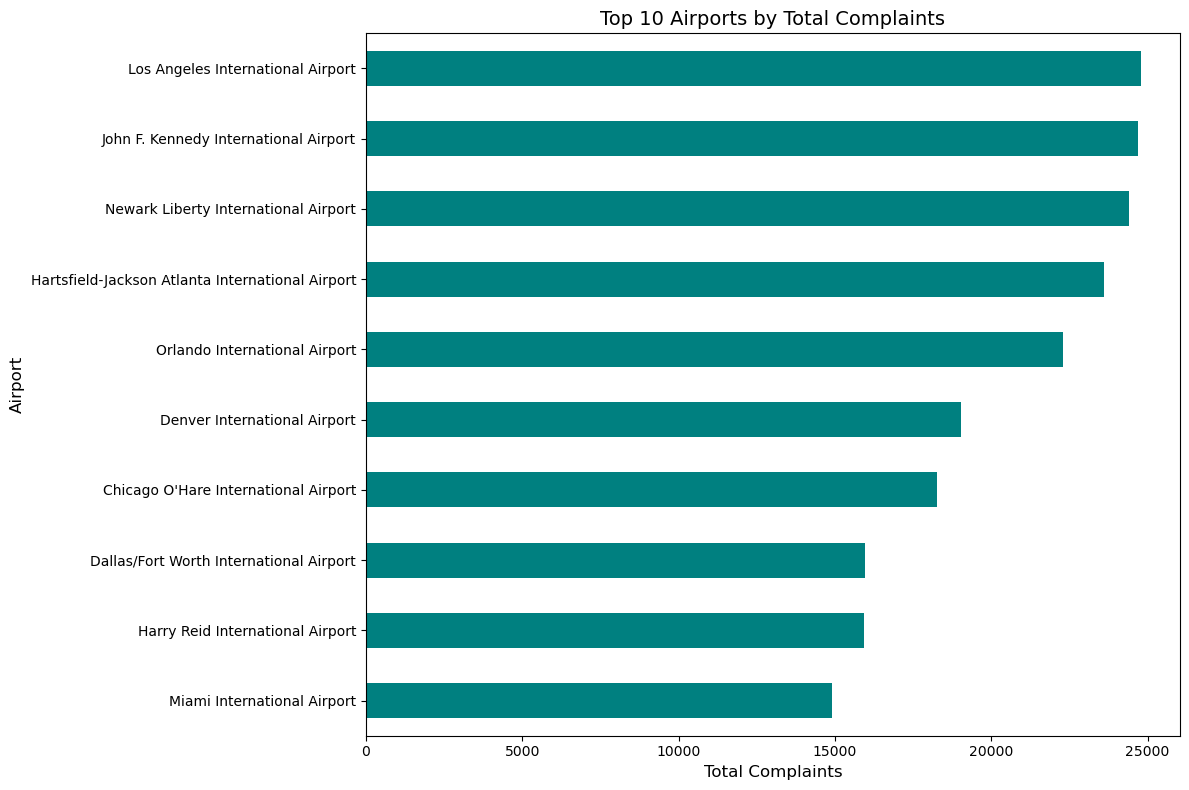

In [21]:
# Bar Chart: Top 10 airports by total complaints
plt.figure(figsize=(12, 8))
top_airports = complaints_airport_merged.groupby('airport_y')['count'].sum().nlargest(10).sort_values()
top_airports.plot(kind='barh', color='teal')
plt.title("Top 10 Airports by Total Complaints", fontsize=14)
plt.xlabel("Total Complaints", fontsize=12)
plt.ylabel("Airport", fontsize=12)
plt.tight_layout()
plt.show()